In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt
import sklearn
import pandas as pd
from pandas import DataFrame, Series
from numpy import nan as NA

In [2]:
def summ(x,label):
    percentile=np.percentile(x,[2.5,25,50,75,97.5]).tolist()
    summ=[np.mean(x),np.std(x)]
    summ.extend(percentile)
    summ=DataFrame(summ,index=["mean","sd","2.5%","25%","50%","75%","97.5%"],columns=[label]).T
    return summ

In [4]:
data=pd.read_table("C:\Users\User\Dropbox\BDA3\election.txt",sep=" ")
#data=pd.read_table("C:\Users\Tomoki\Documents\Dropbox\BDA3\election.txt",sep=" ")

In [5]:
data_drop=data[data.ix[:,2]!=40].dropna()

In [6]:
y_train=data_drop.ix[:,0][data.ix[:,1]!=1992]
y_test=data_drop.ix[:,0][data.ix[:,1]==1992]
X_train=data_drop.ix[:,4:][data.ix[:,1]!=1992]
X_test=data_drop.ix[:,4:][data.ix[:,1]==1992]

C:\Users\User\Anaconda\lib\site-packages\pandas\core\frame.py:1808: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


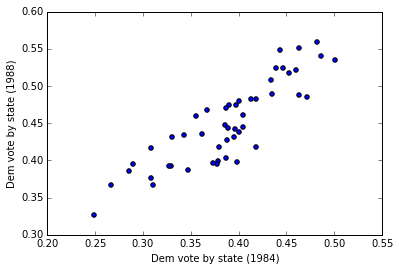

In [7]:
plt.scatter(data.ix[:,0][data.ix[:,1]!=1992][data.ix[:,2]!=40][data.ix[:,1]==1984],
            data.ix[:,0][data.ix[:,1]!=1992][data.ix[:,2]!=40][data.ix[:,1]==1988])
plt.xlabel("Dem vote by state (1984)")
plt.ylabel("Dem vote by state (1988)")

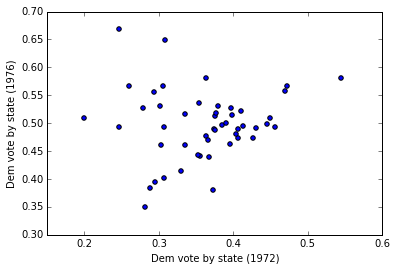

In [8]:
plt.scatter(data.ix[:,0][data.ix[:,1]!=1992][data.ix[:,2]!=40][data.ix[:,1]==1972],
            data.ix[:,0][data.ix[:,1]!=1992][data.ix[:,2]!=40][data.ix[:,1]==1976])
plt.xlabel("Dem vote by state (1972)")
plt.ylabel("Dem vote by state (1976)")

In [9]:
k=len(X_train.T)
n=len(X_train)
beta_hat=np.dot(np.dot(np.linalg.inv(np.dot(X_train.T,X_train)),X_train.T),y_train)
V_beta=np.linalg.inv(np.dot(X_train.T,X_train))
s2=1./(n-k)*np.dot((y_train-np.dot(X_train,beta_hat)),(y_train-np.dot(X_train,beta_hat)))

In [10]:
sigma2=[]
beta=[]
for i in range(1000):
    sigma2.append((n-k)*s2/sp.stats.chi.rvs(df=n-k))
    beta.append(np.random.multivariate_normal(beta_hat,V_beta*sigma2[i]))

In [11]:
beta_dataframe=DataFrame(beta)

In [12]:
for i in range(len(data.columns[4:])):
    print summ(beta_dataframe.ix[:,i],data.columns[4:][i])

              mean        sd      2.5%       25%      50%       75%     97.5%
constant  0.309157  0.066522  0.178721  0.262339  0.30911  0.354049  0.439835
        mean        sd      2.5%       25%       50%       75%     97.5%
n1  0.354395  0.140519  0.085922  0.260124  0.354047  0.448921  0.636613
        mean       sd      2.5%       25%     50%       75%     97.5%
n2 -0.019005  0.02744 -0.073075 -0.036949 -0.0195 -0.000904  0.034283
        mean        sd      2.5%       25%       50%      75%     97.5%
n3  0.056414  0.041988 -0.023154  0.028708  0.055732  0.08592  0.139276
        mean        sd      2.5%       25%       50%       75%     97.5%
n4  0.025781  0.007912  0.010902  0.020701  0.025501  0.031173  0.041107
        mean        sd      2.5%       25%       50%       75%     97.5%
s1  0.278619  0.186171 -0.085501  0.147322  0.277848  0.402076  0.626701
        mean        sd      2.5%       25%      50%       75%     97.5%
s2  0.232687  0.138632 -0.037461  0.145518  0.2352

In [13]:
summ(sigma2,u"$\sigma^2$")

,mean,sd,2.5%,25%,50%,75%,97.5%
$\sigma^2$,0.028968,0.000904,0.027283,0.02832,0.028929,0.029543,0.030876


In [14]:
y_rep=[]
for i in range(1):
    y_rep.append(np.random.multivariate_normal(np.dot(X_train,beta[i]),sigma2[i]*np.identity(len(X_train))))

In [15]:
year=np.arange(1944,1989,4)
T=[]
T_rep=[]
for i in range(200):
    T.append(np.mean(np.mean(y_train-np.dot(X_train,beta[i]))))
    T_rep.append(np.mean(np.square(y_rep[0]-np.dot(X_train,beta[i]))))

(-0.5, 1.2)

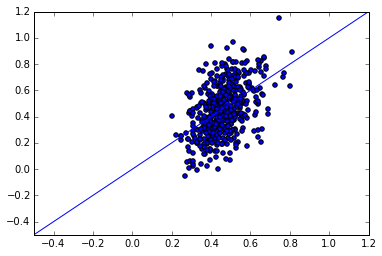

In [16]:
plt.scatter(y_train,y_rep[0])
plt.plot([-0.5,1.2],[-0.5,1.2])
plt.xlim([-0.5,1.2])
plt.ylim([-0.5,1.2])

In [85]:
data_drop=data[data.ix[:,2]!=40][data.ix[:,1]!=1992].dropna()

north=[7,  8, 19, 20, 21, 29, 30, 32, 38, 39, 45, 48]
south=[1,  4,  9, 10, 17, 18, 24,33, 36, 40, 42, 43, 46]
midwest=[13, 14, 15, 16, 22, 23, 25, 27, 34, 35, 41, 49]
west=[2,  3,  5,  6, 11,12, 26, 28, 31, 37, 44, 47, 50]
year=np.arange(1948,1989,4)

year_dummy=pd.get_dummies(data_drop.dropna()[data_drop.ix[:,1]!=1992].ix[:,1])
region_dummy=pd.get_dummies(data_drop.dropna()[data_drop.ix[:,1]!=1992].ix[:,2])
year_dummy_1992=pd.get_dummies(data_drop.dropna()[data_drop.ix[:,1]==1992].ix[:,1])
region_dummy_1992=pd.get_dummies(data_drop.dropna()[data_drop.ix[:,1]==1992].ix[:,2])

region_by_year=DataFrame(np.zeros((44,len(year_dummy)))).T

index=data_drop.index
for i in range(len(index)):
    for j, y in enumerate(year):
        if data_drop.ix[index[i],1]==y:
            if data_drop.ix[index[i],2] in north:
                region_by_year.ix[i,j*4]=1
        if data_drop.ix[index[i],1]==y:
            if data_drop.ix[index[i],2] in south:
                region_by_year.ix[i,j*4+1]=1
        if data_drop.ix[index[i],1]==y:
            if data_drop.ix[index[i],2] in midwest:
                region_by_year.ix[i,j*4+2]=1
        if data_drop.ix[index[i],1]==y:
            if data_drop.ix[index[i],2] in west:
                region_by_year.ix[i,j*4+3]=1

In [88]:
d=pd.concat([DataFrame(np.array(data_drop)),DataFrame(np.array(year_dummy)),region_by_year],axis=1)

In [92]:
k=len(d.T)
n=len(d)
beta_hat=np.dot(np.dot(np.linalg.inv(np.dot(d.T,d)),d.T),y_train)
V_beta=np.linalg.inv(np.dot(d.T,d))
s2=1./(n-k)*np.dot((y_train-np.dot(d,beta_hat)),(y_train-np.dot(d,beta_hat)))

In [94]:
sigma2=[]
beta=[]
for i in range(1000):
    sigma2.append((n-k)*s2/sp.stats.chi.rvs(df=n-k))
    beta.append(np.random.multivariate_normal(beta_hat,V_beta*sigma2[i]))

C:\Users\User\Anaconda\lib\site-packages\IPython\kernel\__main__.py:5: RuntimeWarning: covariance is not positive-semidefinite.


In [96]:
y_rep=[]
for i in range(1):
    y_rep.append(np.random.multivariate_normal(np.dot(d,beta[i]),sigma2[i]*np.identity(len(d))))

In [101]:
sigma2

[1483.6356550532075,
 1503.3749608141502,
 1530.2090787695411,
 1571.7443977923629,
 1597.8616627830611,
 1412.1609787288869,
 1524.7429688851523,
 1378.1289724825781,
 1502.7861528547949,
 1471.4866772439091,
 1548.143803847048,
 1566.5860863733924,
 1615.927226786205,
 1443.4714759555804,
 1489.1138935142949,
 1393.3756486106672,
 1629.7699457248912,
 1529.1197113652402,
 1438.4670899574564,
 1473.1529424013718,
 1552.5350967384388,
 1410.2800622826703,
 1515.6832257228596,
 1452.8126938593753,
 1453.5783714869103,
 1486.4391618338875,
 1519.0428555743943,
 1350.5584751059848,
 1492.4090035717882,
 1533.8007793890367,
 1518.718620694005,
 1378.0911051172286,
 1520.7699645720465,
 1413.4022670689783,
 1541.5227821425672,
 1461.0210326057668,
 1514.8247046764991,
 1506.6387328569599,
 1542.4548603925391,
 1522.7783838463849,
 1515.239413722413,
 1639.4583813622221,
 1395.9294872143337,
 1495.5706762774453,
 1461.3039070895024,
 1511.5757018323986,
 1548.1888553624549,
 1583.16851136152